In [25]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize

## Method 2: Abs expected loss + Bisection

In [26]:
def ExpectedLoss(mean, std, alt, cost):
    '''
    This function calculates E[(g-V)^+]-c for given values g, c and a normal random variable V~N(mu, sigma^2)
    Input: mean and standard deviation the normal random variable V, alternative g, cost c
    '''
    
    z = (mean - alt) / std
    
    EI = (mean - alt) * np.where(std == 0, 0.0, np.nan_to_num(norm.cdf(z))) + std * np.nan_to_num(norm.pdf(z)) 
    
    exp_loss = EI - cost
    
    return exp_loss

In [27]:
# Define the acquisition function of the Gittins policy
def Gittins_acq(mean, std, cost):
    '''
    Gittins index minimizes the difference between the expected improvement and the query cost 
    Favor points where there is a smaller Gittins index compared to the current best observed value
    Return the point with minimum Gittins index
    '''

    size = np.size(mean)
    
    l = bound[:,0]*np.ones(size)
    h = bound[:,1]*np.ones(size)
    m = (h+l)/2
    
    while np.any(ExpectedLoss(mean, std, l, cost) < 0):
        l = 2*l
    while np.any(ExpectedLoss(mean, std, h, cost) > 0):
        h = 2*h
    
    # Bisection method
    while np.max(np.abs(ExpectedLoss(mean, std, m, cost))) >= eps:
        sgn_l = np.sign(ExpectedLoss(mean, std, l, cost))
        sgn_m = np.sign(ExpectedLoss(mean, std, m, cost))
        sgn_h = np.sign(ExpectedLoss(mean, std, h, cost))
        if np.all(sgn_m == 0):
            return m
        l = np.where(sgn_m >= 0, m, l)
        h = np.where(sgn_m <= 0, m, h)
        m = (h+l)/2
        
    return m

In [14]:
import numpy as np

def expectation_of_min_of_maxima(K, mu, sigma, g, num_simulations=10000):
    """
    Estimate the expectation of the minimum of the maxima of g and each of K iid normal random variables.

    Parameters:
    K (int): Number of random variables.
    mu (float): Mean of the normal distribution.
    sigma (float): Standard deviation of the normal distribution.
    g (float): Constant value for comparison.
    num_simulations (int): Number of Monte Carlo simulations to run.

    Returns:
    float: Estimated expectation.
    """
    # Initialize a list to store the minimum of maxima values
    min_of_maxima_values = []

    for _ in range(num_simulations):
        # Generate K random variables from the normal distribution
        sample = np.random.normal(mu, sigma, K)
        # Compute max(g, X_i) for each X_i in the sample
        max_values = [max(g, x) for x in sample]
        # Find the minimum of these max values
        min_of_maxima = min(max_values)
        # Add this minimum to the list
        min_of_maxima_values.append(min_of_maxima)

    # Calculate the average of these minimum values as the estimated expectation
    return np.mean(min_of_maxima_values)

In [15]:
bound = np.array([[-10, 10]])
eps = 1e-5

In [16]:
# Example usage with the same parameters as before
K = 50  # Number of random variables
mu = 0   # Mean of the normal distribution
sigma = 4 # Standard deviation of the normal distribution
lmbda = 0.0001
g = Gittins_acq(mean=mu, std=sigma, cost=lmbda)  # Constant value for comparison

# Estimate the expectation
estimated_expectation_min_of_maxima = expectation_of_min_of_maxima(K, mu, sigma, g)
estimated_expectation_min_of_maxima

14.84375

In [28]:
# Define the range for mu (mean) and sigma (standard deviation)
mu_min, mu_max = -0.2, 0.2  # Replace with the range you want for the mean
sigma_min, sigma_max = 0.1, 1  # Replace with the range you want for the standard deviation

# Define how many points you want to generate for each variable
mu_points, sigma_points = 100, 100  # The more points, the smoother the plot

# Generate the values for mu and sigma
mu_values = np.linspace(mu_min, mu_max, mu_points)
sigma_values = np.linspace(sigma_min, sigma_max, sigma_points)

# Create the meshgrid for mu and sigma
mu_grid, sigma_grid = np.meshgrid(mu_values, sigma_values)

# Now mu_grid and sigma_grid contain the coordinates of the points in your grid

In [31]:
# Assuming you have defined Gittins_acq, mu_values, sigma_values, and cost

cost = 0.01
bound = np.array([[-10, 10]])
eps = 0.00001

# Flatten the mu_grid and sigma_grid to 1D arrays for input to the function
mu_flat = mu_grid.ravel()
sigma_flat = sigma_grid.ravel()

# Compute the gi values using the flattened arrays
gi_flat = Gittins_acq(mu_flat, sigma_flat, cost)

# Reshape the flat gi values back to the original grid shape for plotting
gi_grid = gi_flat.reshape(mu_grid.shape)

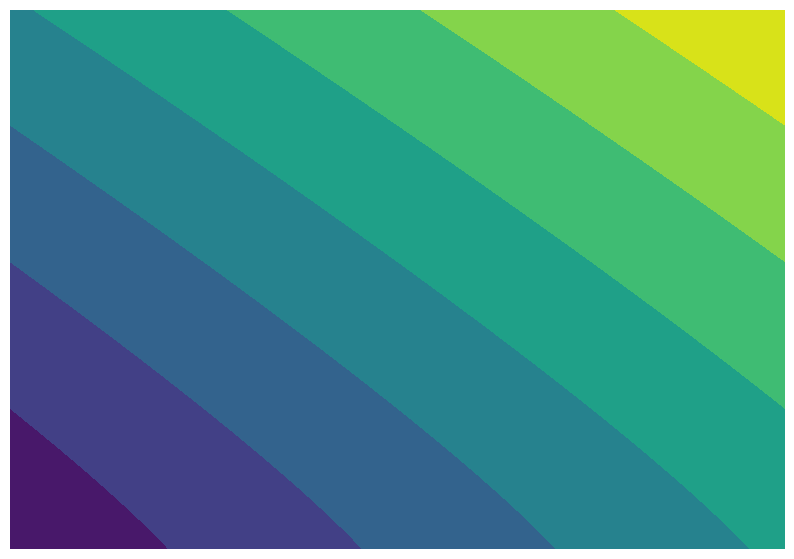

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Assume mu_grid, sigma_grid, and Gittins_acq are defined as before

# Create a contour plot
plt.figure(figsize=(10, 7))
cp = plt.contourf(mu_grid, sigma_grid, gi_grid, cmap='viridis')
plt.axis("off")
plt.savefig('gittins.png',bbox_inches='tight',pad_inches = 0)

In [33]:
mu_grid

array([[-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ],
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ],
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ],
       ...,
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ],
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ],
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ]])

In [34]:
sigma_grid

array([[0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       [0.10909091, 0.10909091, 0.10909091, ..., 0.10909091, 0.10909091,
        0.10909091],
       [0.11818182, 0.11818182, 0.11818182, ..., 0.11818182, 0.11818182,
        0.11818182],
       ...,
       [0.98181818, 0.98181818, 0.98181818, ..., 0.98181818, 0.98181818,
        0.98181818],
       [0.99090909, 0.99090909, 0.99090909, ..., 0.99090909, 0.99090909,
        0.99090909],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [35]:
gi_grid

array([[-0.90976715, -0.88954926, -0.86933136, ...,  1.04984283,
         1.07006073,  1.09020233],
       [-0.89641571, -0.87619781, -0.85605621, ...,  1.06319427,
         1.08333588,  1.10355377],
       [-0.88275909, -0.8625412 , -0.8423996 , ...,  1.07685089,
         1.09699249,  1.11721039],
       ...,
       [ 0.89626312,  0.91648102,  0.93662262, ...,  2.85587311,
         2.87601471,  2.8962326 ],
       [ 0.91732025,  0.93746185,  0.95767975, ...,  2.87685394,
         2.89707184,  2.91728973],
       [ 0.93837738,  0.95859528,  0.97873688, ...,  2.89798737,
         2.91812897,  2.93834686]])

In [39]:
# Reshape or transpose if necessary (depends on how you want to align them)
arrays_combined = np.hstack((mu_grid.flatten(), sigma_grid.flatten(), gi_grid.flatten(), ei_grid.flatten()))

# Reshape back to have 4 columns, one for each original array
arrays_combined_reshaped = arrays_combined.reshape(-1, 4)

# Save to CSV
np.savetxt('arrays_combined.csv', arrays_combined_reshaped, delimiter=',', fmt='%f')

# fmt='%d' is used to format the numbers as integers, change it according to your data type.

In [36]:
np.save('mu_grid.npy', mu_grid)
np.save('sigma_grid.npy', sigma_grid)
np.save('gi_grid.npy', gi_grid)
np.save('ei_grid.npy', ei_grid)

In [36]:
from sklearn.linear_model import LinearRegression

# Linear regression to estimate beta
X = np.column_stack((mu_flat.ravel(), sigma_flat.ravel()))
y = gi_grid.ravel() - cost
model = LinearRegression().fit(X, y)
beta_estimated = -model.coef_[1]
print(f"Estimated Beta: {beta_estimated}")

Estimated Beta: -2.0796570811255854


In [30]:
from sklearn.linear_model import LinearRegression

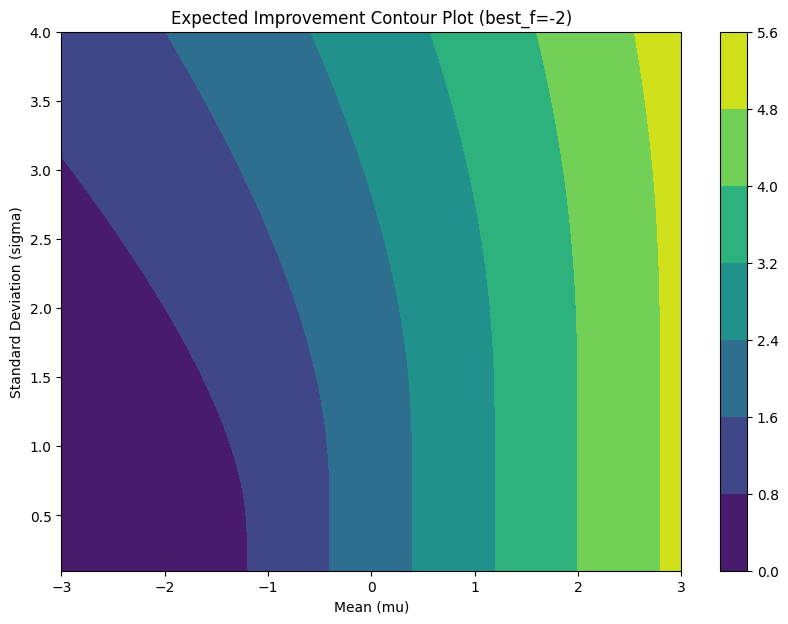

Estimated Beta: 0.22139609762952434


In [31]:
import matplotlib.pyplot as plt
# Assuming you have defined Gittins_acq, mu_values, sigma_values, and cost

alt=-2
bound = np.array([[-10, 10]])
eps = 0.00001

# Flatten the mu_grid and sigma_grid to 1D arrays for input to the function
mu_flat = mu_grid.ravel()
sigma_flat = sigma_grid.ravel()

# Compute the gi values using the flattened arrays
ei_flat = ExpectedLoss(mu_flat, sigma_flat, alt=alt, cost=0)

# Reshape the flat gi values back to the original grid shape for plotting
ei_grid = ei_flat.reshape(mu_grid.shape)

# Assume mu_grid, sigma_grid, and Gittins_acq are defined as before

# Create a contour plot
plt.figure(figsize=(10, 7))
cp = plt.contourf(mu_grid, sigma_grid, ei_grid, cmap='viridis')
plt.colorbar(cp)  # Show a color bar

plt.xlabel('Mean (mu)')
plt.ylabel('Standard Deviation (sigma)')
plt.title('Expected Improvement Contour Plot (best_f={})'.format(alt))
plt.show()

# from sklearn.linear_model import LinearRegression

# Linear regression to estimate beta
X = np.column_stack((mu_flat.ravel(), sigma_flat.ravel()))
y = ei_grid.ravel() - cost
model = LinearRegression().fit(X, y)
beta_estimated = model.coef_[1]
print(f"Estimated Beta: {beta_estimated}")

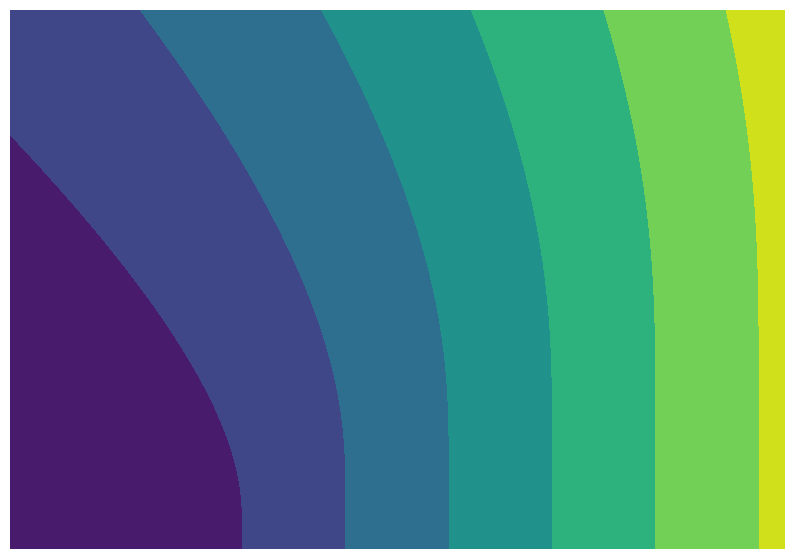

In [53]:
# Create a contour plot
plt.figure(figsize=(10, 7))
cp = plt.contourf(mu_grid, sigma_grid, ei_grid, cmap='viridis')
plt.axis("off")
plt.savefig('ei.png',bbox_inches='tight',pad_inches = 0)

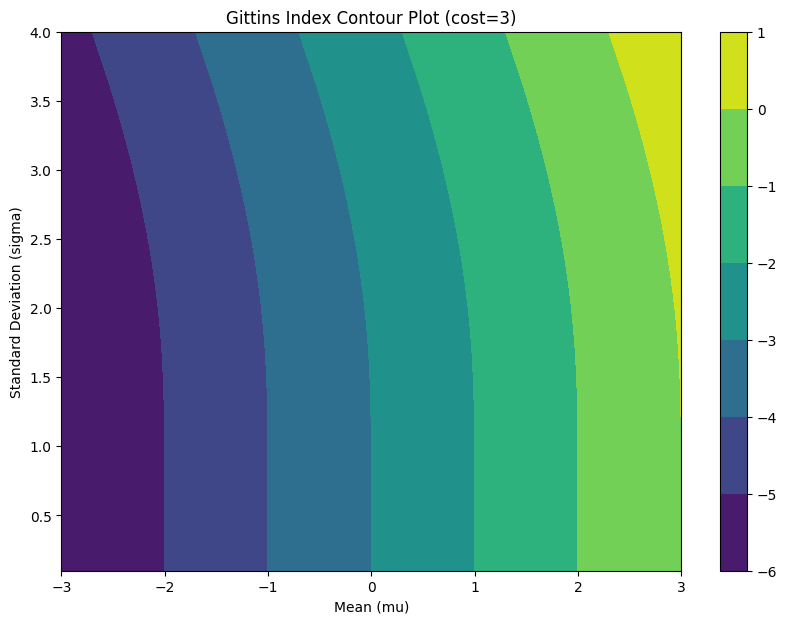

Estimated Beta: 0.16910000145435333


In [27]:
# Assuming you have defined Gittins_acq, mu_values, sigma_values, and cost

cost = 3
bound = jnp.array([[-10, 10]])
eps = 0.00001

# Flatten the mu_grid and sigma_grid to 1D arrays for input to the function
mu_flat = mu_grid.ravel()
sigma_flat = sigma_grid.ravel()

# Compute the gi values using the flattened arrays
gi_flat = Gittins_acq(mu_flat, sigma_flat, cost)

# Reshape the flat gi values back to the original grid shape for plotting
gi_grid = gi_flat.reshape(mu_grid.shape)

# Assume mu_grid, sigma_grid, and Gittins_acq are defined as before

# Create a contour plot
plt.figure(figsize=(10, 7))
cp = plt.contourf(mu_grid, sigma_grid, gi_grid, cmap='viridis')
plt.colorbar(cp)  # Show a color bar

plt.xlabel('Mean (mu)')
plt.ylabel('Standard Deviation (sigma)')
plt.title('Gittins Index Contour Plot (cost={})'.format(cost))
plt.show()

# from sklearn.linear_model import LinearRegression

# Linear regression to estimate beta
X = jnp.column_stack((mu_flat.ravel(), sigma_flat.ravel()))
y = gi_grid.ravel() - cost
model = LinearRegression().fit(X, y)
beta_estimated = model.coef_[1]
print(f"Estimated Beta: {beta_estimated}")

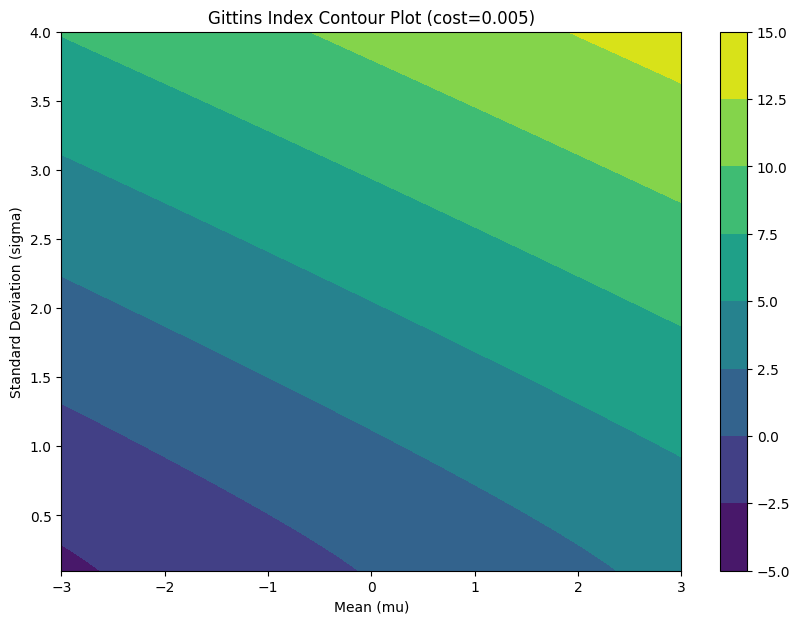

Estimated Beta: 2.723942995071411


In [128]:
# Assuming you have defined Gittins_acq, mu_values, sigma_values, and cost

cost = 0.005
bound = jnp.array([[-10, 10]])
eps = 0.00001

# Flatten the mu_grid and sigma_grid to 1D arrays for input to the function
mu_flat = mu_grid.ravel()
sigma_flat = sigma_grid.ravel()

# Compute the gi values using the flattened arrays
gi_flat = Gittins_acq(mu_flat, sigma_flat, cost)

# Reshape the flat gi values back to the original grid shape for plotting
gi_grid = gi_flat.reshape(mu_grid.shape)

# Assume mu_grid, sigma_grid, and Gittins_acq are defined as before

# Create a contour plot
plt.figure(figsize=(10, 7))
cp = plt.contourf(mu_grid, sigma_grid, gi_grid, cmap='viridis')
plt.colorbar(cp)  # Show a color bar

plt.xlabel('Mean (mu)')
plt.ylabel('Standard Deviation (sigma)')
plt.title('Gittins Index Contour Plot (cost={})'.format(cost))
plt.show()

# from sklearn.linear_model import LinearRegression

# Linear regression to estimate beta
X = jnp.column_stack((mu_flat.ravel(), sigma_flat.ravel()))
y = gi_grid.ravel() - cost
model = LinearRegression().fit(X, y)
beta_estimated = model.coef_[1]
print(f"Estimated Beta: {beta_estimated}")

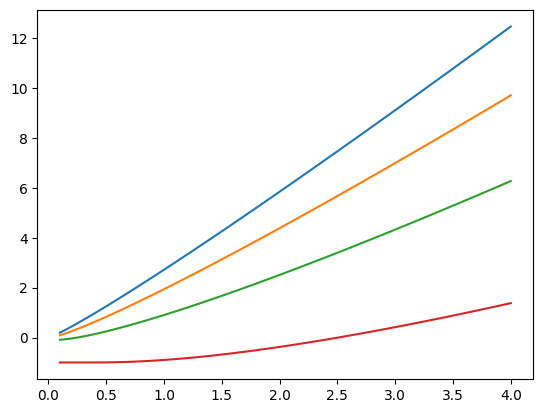

In [138]:
plt.plot(sigma_values, Gittins_acq(0, sigma_values, 0.001))
plt.plot(sigma_values, Gittins_acq(0, sigma_values, 0.01))
plt.plot(sigma_values, Gittins_acq(0, sigma_values, 0.1))
plt.plot(sigma_values, Gittins_acq(0, sigma_values, 1))

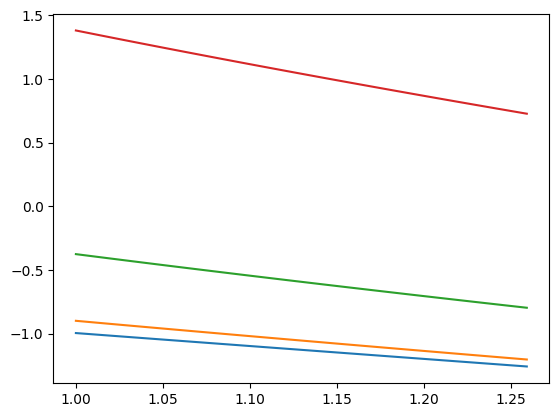

In [66]:
some_values = np.logspace(0.0000001, 0.1, 100)


plt.plot(some_values, Gittins_acq(0, 0.5, some_values))
plt.plot(some_values, Gittins_acq(0, 1, some_values))
plt.plot(some_values, Gittins_acq(0, 2, some_values))
plt.plot(some_values, Gittins_acq(0, 4, some_values))

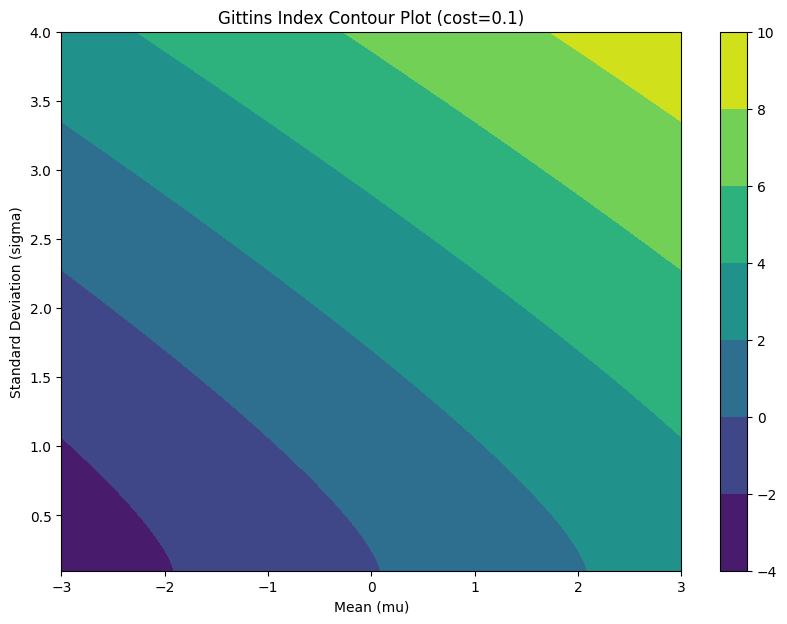

Estimated Beta: 1.6868071556091309


In [22]:
# Assuming you have defined Gittins_acq, mu_values, sigma_values, and cost

cost = 0.1
bound = jnp.array([[-10, 10]])
eps = 0.000001

# Flatten the mu_grid and sigma_grid to 1D arrays for input to the function
mu_flat = mu_grid.ravel()
sigma_flat = sigma_grid.ravel()

# Compute the gi values using the flattened arrays
gi_flat = Gittins_acq(mu_flat, sigma_flat, cost)

# Reshape the flat gi values back to the original grid shape for plotting
gi_grid = gi_flat.reshape(mu_grid.shape)

# Assume mu_grid, sigma_grid, and Gittins_acq are defined as before

# Create a contour plot
plt.figure(figsize=(10, 7))
cp = plt.contourf(mu_grid, sigma_grid, gi_grid, cmap='viridis')
plt.colorbar(cp)  # Show a color bar

plt.xlabel('Mean (mu)')
plt.ylabel('Standard Deviation (sigma)')
plt.title('Gittins Index Contour Plot (cost={})'.format(cost))
plt.show()

# from sklearn.linear_model import LinearRegression

# Linear regression to estimate beta
X = jnp.column_stack((mu_flat.ravel(), sigma_flat.ravel()))
y = gi_grid.ravel() - cost
model = LinearRegression().fit(X, y)
beta_estimated = model.coef_[1]
print(f"Estimated Beta: {beta_estimated}")

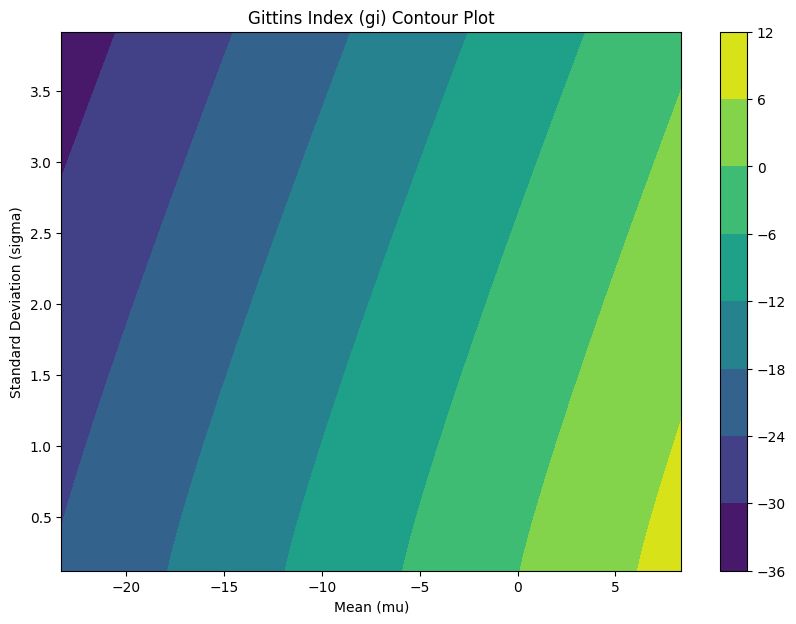

Estimated Beta: 2.505859136581421


In [22]:
# Assuming you have defined Gittins_acq, mu_values, sigma_values, and cost

cost = 0.01
bound = jnp.array([[-10, 10]])
eps = 0.00001

# Flatten the mu_grid and sigma_grid to 1D arrays for input to the function
mu_flat = mu_grid.ravel()
sigma_flat = sigma_grid.ravel()

# Compute the gi values using the flattened arrays
gi_flat = Gittins_acq(mu_flat, sigma_flat, cost)

# Reshape the flat gi values back to the original grid shape for plotting
gi_grid = gi_flat.reshape(mu_grid.shape)

# Assume mu_grid, sigma_grid, and Gittins_acq are defined as before

# Create a contour plot
plt.figure(figsize=(10, 7))
cp = plt.contourf(mu_grid, sigma_grid, gi_grid, cmap='viridis')
plt.colorbar(cp)  # Show a color bar

plt.xlabel('Mean (mu)')
plt.ylabel('Standard Deviation (sigma)')
plt.title('Gittins Index (gi) Contour Plot')
plt.show()

# from sklearn.linear_model import LinearRegression

# Linear regression to estimate beta
X = jnp.column_stack((mu_flat.ravel(), sigma_flat.ravel()))
y = gi_grid.ravel() - cost
model = LinearRegression().fit(X, y)
beta_estimated = -model.coef_[1]
print(f"Estimated Beta: {beta_estimated}")

In [53]:
def equation(p, N, T):
    return (1 - (1 - p)**N) / p - T

def find_p(N, T, tolerance=1e-6, max_iterations=1000):
    # Define an initial interval [a, b] where we expect the solution to be.
    a, b = 0.0005, 1.0

    # Check if the equation has the same sign at the endpoints.
    if equation(a, N, T) * equation(b, N, T) >= 0:
        print("No solution found in the given interval.")
        return None

    # Perform a bisection search to find the root (solution).
    for i in range(max_iterations):
        p = (a + b) / 2  # Calculate the midpoint.
        if abs(equation(p, N, T)) < tolerance:
            return p  # Found an approximate solution.

        if equation(p, N, T) * equation(a, N, T) < 0:
            b = p  # Move the right endpoint to the midpoint.
        else:
            a = p  # Move the left endpoint to the midpoint.

    return p

find_p(N=51,T=50)

0.0007945268508046868

In [54]:
def ComputeLambda(var, N, T):
    p = find_p(N=N, T=T)
    print(p)
    return ExpectedLoss(mean=0, std=jnp.sqrt(var), alt=norm.ppf(p)*jnp.sqrt(var), cost=0)

In [96]:
adaptive_costs = jnp.array([])
for i in range(1,52):
    adaptive_costs = jnp.append(adaptive_costs, ComputeLambda(var=2.0, N=2*i+20, T=2*i))

In [97]:
adaptive_costs

Array([0.56418926, 0.21065448, 0.12388104, 0.0849404 , 0.0629461 ,
       0.0489272 , 0.0392992 , 0.03234076, 0.02712036, 0.02308969,
       0.01990559, 0.01734249, 0.01524665, 0.01350974, 0.01205347,
       0.01082007, 0.00976603, 0.00885806, 0.00807028, 0.00738232,
       0.00677801, 0.00624434, 0.00577067, 0.00534837, 0.00497032,
       0.0046305 , 0.00432398, 0.00404657, 0.00379466, 0.0035653 ,
       0.00335583, 0.00316406, 0.00298805, 0.00282613, 0.00267684,
       0.0025389 , 0.00241121, 0.00229279, 0.00218275, 0.00208033,
       0.00198485, 0.0018957 , 0.00181234, 0.00173427, 0.00166107,
       0.00159234, 0.00152771, 0.00146689, 0.00140957, 0.0013555 ,
       0.00130444], dtype=float32)

In [101]:
ComputeLambda(var=2.0,N=1000,T=23)

0.04347825943678617


Array(0.025136, dtype=float32)

In [55]:
ComputeLambda(var=2.0,N=1000,T=50)

0.02000000019744038


Array(0.01038478, dtype=float32)

In [59]:
ComputeLambda(var=2.0,N=10000,T=50)

0.02000000019744038


Array(0.01038478, dtype=float32)